## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics
from sklearn.tree import DecisionTreeClassifier ,DecisionTreeRegressor
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
wine = datasets.load_wine()

x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.25, random_state = 4)

clf = DecisionTreeClassifier()

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [6]:
acc  = metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.9111111111111111


In [12]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

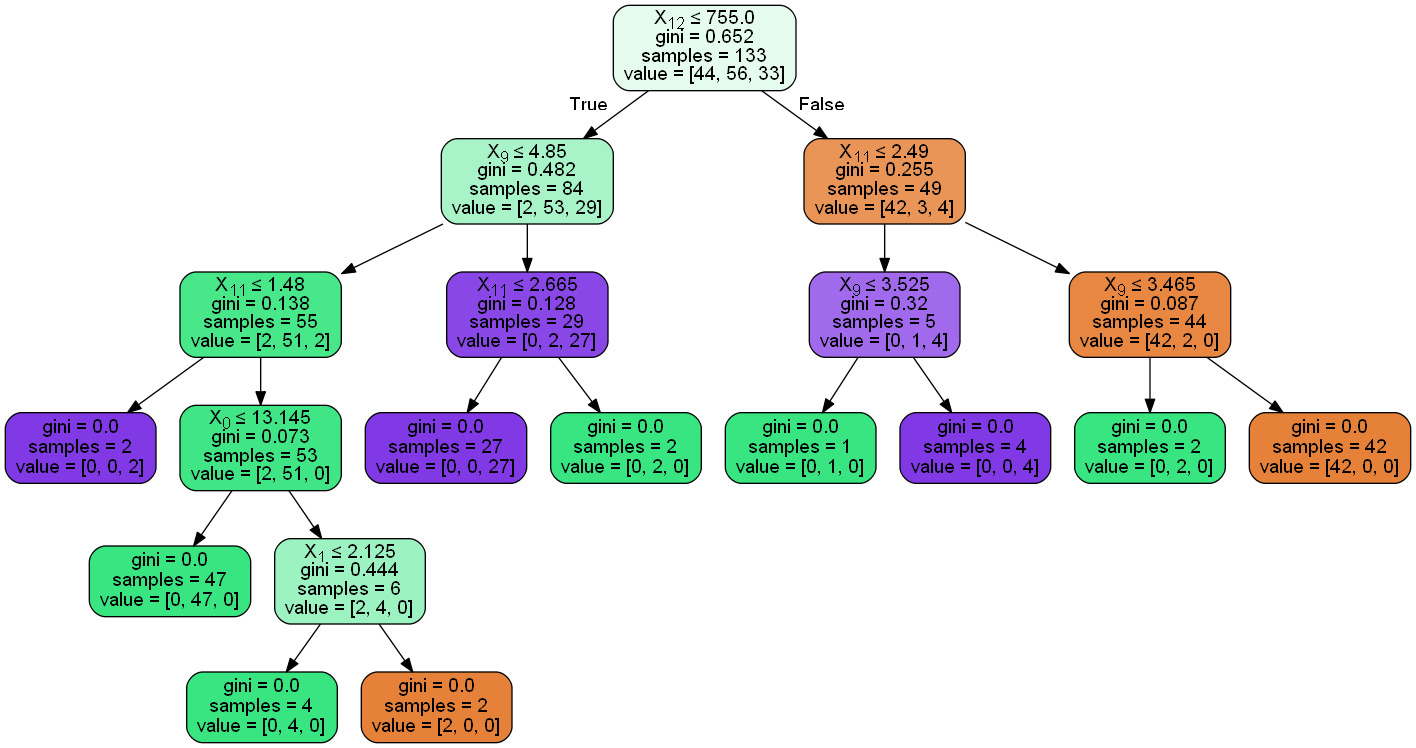

In [13]:

dot_data = StringIO()
export_graphviz(clf,filled=True, out_file=dot_data,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [21]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.01364138 0.03076567 0.         0.         0.         0.
 0.         0.         0.         0.39953541 0.         0.16740754
 0.38865   ]


In [25]:
import numpy as np

In [41]:
feat_labels = wine.feature_names

In [44]:
importances

array([0.01364138, 0.03076567, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.39953541,
       0.        , 0.16740754, 0.38865   ])

In [45]:
np.argsort(importances)

array([ 2,  3,  4,  5,  6,  7,  8, 10,  0,  1, 11, 12,  9], dtype=int64)

In [42]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) color_intensity                0.399535
 2) proline                        0.388650
 3) od280/od315_of_diluted_wines   0.167408
 4) malic_acid                     0.030766
 5) alcohol                        0.013641
 6) hue                            0.000000
 7) proanthocyanins                0.000000
 8) nonflavanoid_phenols           0.000000
 9) flavanoids                     0.000000
10) total_phenols                  0.000000
11) magnesium                      0.000000
12) alcalinity_of_ash              0.000000
13) ash                            0.000000
